In [1]:
import random
import time
import datetime
import pandas as pd
import lightgbm as lgb
import numpy as np
import os
from Intelligent_well_control.src.models.utils.save_to_csv import SaveToCsv
from Intelligent_well_control.src.models.LGBM import LGBModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from Intelligent_well_control.src.models.utils.plt import PLT
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'E:\data\压井\新数据\间接数据\大区块数据2.csv')

这里使用前面三口井来训练，使用以前的特征，并且全过程标准化数据！

In [3]:
labels = 'overflow_detected'
rem_col_list = ['id', 'well_id', 'time', 'overflow_flag',
                'work_state', 'invader_type', 'kill_main_method_x',
                'deal_density', 'overflow_detected', 'block_id',
                'standpipe_pressure', 'casing_pressure']
feature_names1 = list(
                filter(lambda x: x not in rem_col_list, data.columns))

model1 = lgb.LGBMClassifier(n_estimators=500)

train_well_ids = [11, 21, 17]
test_well_ids = [111]

X_train = data[data['well_id'].isin(train_well_ids)][feature_names1]
Y_train = data[data['well_id'].isin(train_well_ids)][labels]
X_test = data[data['well_id'].isin(test_well_ids)][feature_names1]
Y_test = data[data['well_id'].isin(test_well_ids)][labels]

# X_train['hook_load'] = X_train['hook_load'] * 100

# 初始化 StandardScaler
scaler = StandardScaler()

# 对数据进行标准化
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
# X_train_tem.columns = X_train.columns


model1.fit(X_train, Y_train)

Y_pred = model1.predict(X_test)
acc = accuracy_score(Y_pred, Y_test)
print(acc)

0.2711644033516325


在用111自己的训练与测试！

In [20]:
X = data[data['well_id'].isin(test_well_ids)][feature_names1]
y = data[data['well_id'].isin(test_well_ids)][labels]

print(X.shape, y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 对数据进行标准化
# X_train_tem = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

model2 = lgb.LGBMClassifier(n_estimators=500)
model2.fit(X_train, Y_train)

Y_pred = model2.predict(X_test)

acc = accuracy_score(Y_pred, Y_test)
print(acc)

(13844, 373) (13844,)
1.0


输出111自己的特征排名前30个

In [21]:
feature_names = X_train.columns
feature_importance = model2.feature_importances_

In [59]:
list_fea = sorted(zip(feature_names, feature_importance), key=lambda x: -x[1])
list_fea_names = [name for name, _ in list_fea][: 1]
print(list_fea_names)

['hook_load']


|利用这三个特征训练模型1

In [60]:
X_train = data[data['well_id'].isin(train_well_ids)][list_fea_names]
Y_train = data[data['well_id'].isin(train_well_ids)][labels]
X_test = data[data['well_id'].isin(test_well_ids)][list_fea_names]
Y_test = data[data['well_id'].isin(test_well_ids)][labels]

# scaler = StandardScaler()

# 对数据进行标准化
# X_train_scaler = scaler.fit_transform(X_train)
# X_test_scaler = scaler.fit_transform(X_test)

model3 = lgb.LGBMClassifier(n_estimators=500)
model3.fit(X_train, Y_train)

Y_pred = model3.predict(X_test)

acc = accuracy_score(Y_pred, Y_test)
print(np.round(acc, 3))


0.044


In [ ]:
plt.figure(figsize=(10, 15))
lgb.plot_importance(model1, max_num_features=100, importance_type='split')
plt.tight_layout()
plt.savefig(r'E:\项目\Intelligent_well_control\reports\images\\是否溢流_9区块前三口训练特征.png')

In [84]:
all_fea_df = None
for well_ids in [11, 21, 17, 111]:
    X = data[data['well_id'] == well_ids][feature_names1]
    y = data[data['well_id'] == well_ids][labels]
    
    print(X.shape, y.shape)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 对数据进行标准化
    # X_train_tem = scaler.fit_transform(X_train)
    # X_test = scaler.fit_transform(X_test)
    
    model3 = lgb.LGBMClassifier(n_estimators=500)
    model3.fit(X_train, Y_train)
    
    
    feature_names = model3.feature_name_
    feature_importance = model3.feature_importances_
    
    
    feature_names = [str(well_ids) + '_' + i for i in feature_names]
    
    # 创建 DataFrame
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df['well_id'] = well_ids
    
    if all_fea_df is None:
        all_fea_df = feature_importance_df
    else:
        all_fea_df = pd.concat([all_fea_df, feature_importance_df])
    
    Y_pred = model3.predict(X_test)
    acc = accuracy_score(Y_pred, Y_test)
    print(well_ids, acc)

(3174, 373) (3174,)
11 1.0
(5805, 373) (5805,)
21 0.9991386735572783
(3933, 373) (3933,)
17 1.0
(13844, 373) (13844,)
111 1.0


In [85]:
all_fea_df

,Feature,Importance,well_id
0,11_standard_well_depth,167,11
1,11_vertical_well_depth,0,11
2,11_bottoms_up_depth,43,11
3,11_lag_time,85,11
4,11_bit_depth,280,11
...,...,...,...
368,111_casing_pipe_pressure,0,111
369,111_overflow_capacity,0,111
370,111_kill_main_method_y,0,111
371,111_deal_duration_hour,0,111


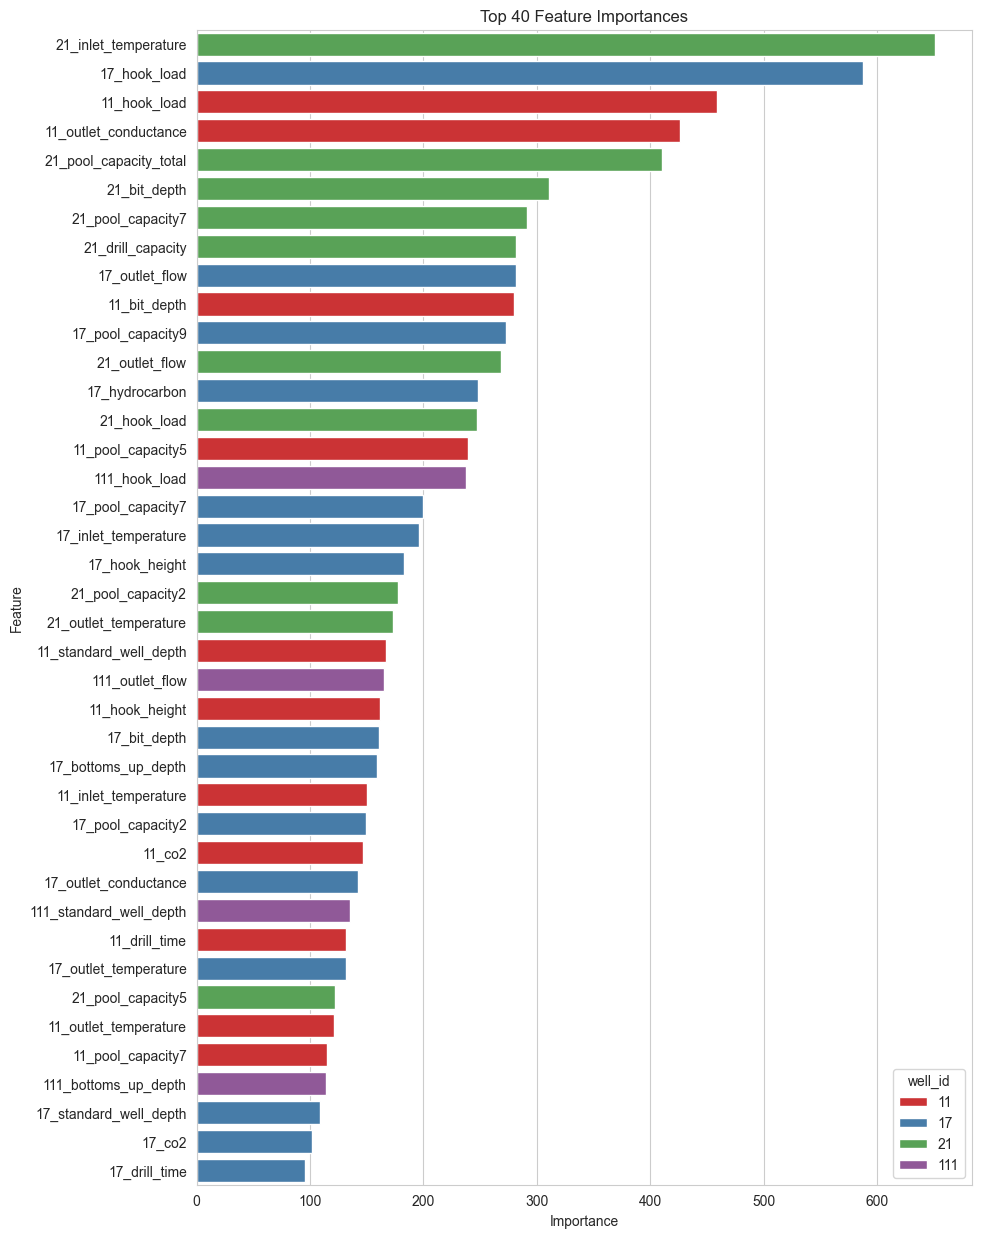

In [90]:
import seaborn as sns
# 获取特征重要性
# 
# feature_names = model1.feature_name_
# feature_importance = model2.feature_importances_
# 
# # 创建 DataFrame
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 按照重要性降序排列
feature_importance_df = all_fea_df.sort_values(by='Importance', ascending=False)

# 输出前 20 个特征
top_40_features = feature_importance_df.head(40)
# print(top_40_features)

plt.figure(figsize=(10, 15))
sns.barplot(x='Importance', y='Feature', data=top_40_features, hue='well_id', orient='h', palette='Set1')
plt.title('Top 40 Feature Importances')
plt.show()



In [71]:
for 

SyntaxError: invalid syntax (3550306636.py, line 1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 创建示例数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# 创建 Figure 对象和子图
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# 绘制第一个子图
axes[0].plot(x, y1)
axes[0].set_title('Plot 1')

# 绘制第二个子图
axes[1].plot(x, y2)
axes[1].set_title('Plot 2')

# 绘制第三个子图
axes[2].plot(x, y3)
axes[2].set_title('Plot 3')

# 调整布局
plt.tight_layout()

# 保存到同一个文件
plt.savefig('combined_plots.png')

# 显示图形（可选）
plt.show()
